 **Dataset**
--
    Data Science EDA
    
### **Data Description**
This dataset compiles information on aviation accidents and associated fatalities worldwide from 1970 through 2025. It includes annual counts of flight crashes and total death tolls, offering insights into trends in aviation safety over five decades.

### **Features**
    Year: Calendar year from 1970 to 2025.
    Crashes: Total number of recorded aviation accidents in that year.
    Deaths: Total number of fatalities resulting from aviation accidents in that year.

## **Import Libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings 
warnings.filterwarnings('ignore')
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-crashes-and-deaths-1970-2025/Airplane Crashses and Deaths (1970-2025).csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# **EDA**

## **Data Exploration**
    During this step we can explore the shape of the data we are working with. It's usual to check and deal with the number of columns and rows, missing values, outliers and other inconsistencies that might appear.
--

In [3]:
df = pd.read_csv('/kaggle/input/flight-crashes-and-deaths-1970-2025/Airplane Crashses and Deaths (1970-2025).csv')
df.head()

,Year,Deaths,Crashes
0,1970,2226,298
1,1971,2228,271
2,1972,3346,344
3,1973,2814,333
4,1974,2621,270


In [4]:
df.dtypes

Year       int64
Deaths     int64
Crashes    int64
dtype: object

In [5]:
df.isnull().mean() # Checking null in each column

Year       0.0
Deaths     0.0
Crashes    0.0
dtype: float64

In [6]:
df[['Deaths','Crashes']].describe().round(2) # Ploting the statistics

,Deaths,Crashes
count,56.00,56.00
mean,1545.79,217.54
std,781.61,73.52
min,178.00,61.00
25%,938.50,162.75
50%,1562.50,228.00
75%,2098.75,267.00
max,3346.00,356.00


## **Statistical Analysis**
    This step seeks to understand the interaction and correlation among the features. Here it's possible to check multicolinearity, plot visulizations and highlight key points.
--

##### **Distribution of features**

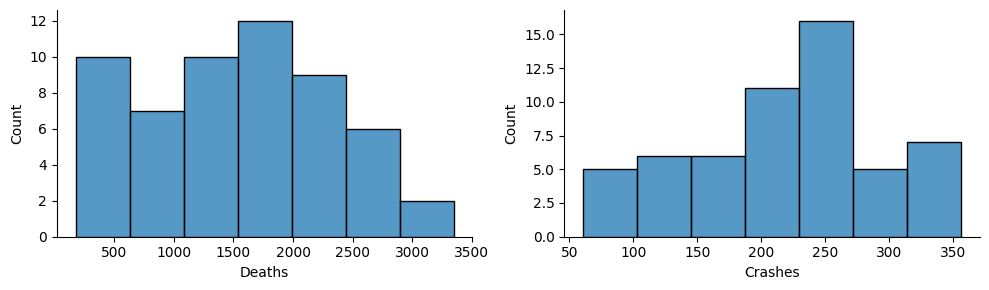

In [7]:
# Checking the distribution of the quantitative columns

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

ax[0] = sns.histplot(data=df, x= 'Deaths', ax=ax[0])
ax[1] = sns.histplot(data=df, x= 'Crashes', ax=ax[1])

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

In [8]:
df['Death_rate'] = (df['Deaths'] / df['Crashes']).round(2) # Creating the Death Rate column for future analysis
df.head()

,Year,Deaths,Crashes,Death_rate
0,1970,2226,298,7.47
1,1971,2228,271,8.22
2,1972,3346,344,9.73
3,1973,2814,333,8.45
4,1974,2621,270,9.71


##### **Correlation of features**

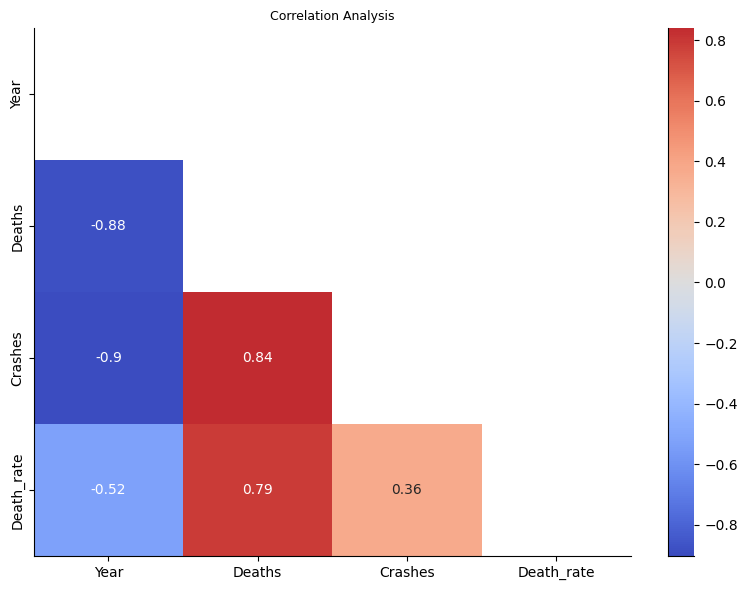

In [9]:
corr = df.select_dtypes(include='number').corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) # Mask to remove the upper side and facilitate visualization

plt.figure(figsize=(8,6))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', center=0)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.title("Correlation Analysis", fontsize=9)
plt.tight_layout()

In [10]:
# Death Rate Moving Average
df['MA'] = df['Death_rate'].rolling(window=3).mean()
df.fillna(0, inplace=True)

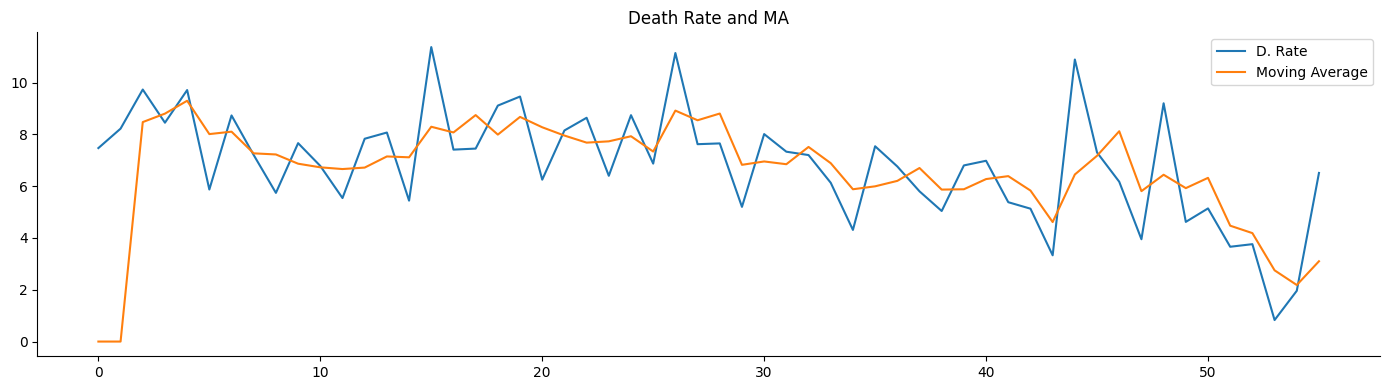

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 4))

df['Death_rate'].plot(label='D. Rate')
df['MA'].plot(label='Moving Average')

plt.title('Death Rate and MA')
plt.legend()

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()
plt.show()

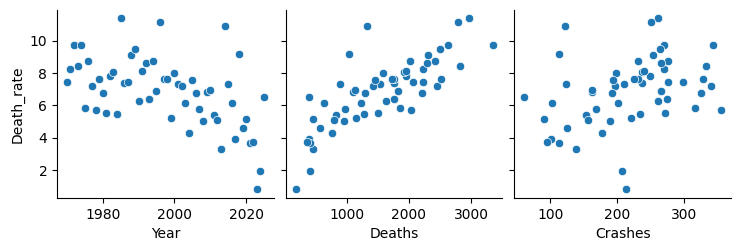

In [12]:
# Correlation of the features with the Adj Close
sns.pairplot(df, kind='scatter', y_vars='Death_rate', x_vars=['Year','Deaths','Crashes'], diag_kind='auto', markers=None, height=2.5)

In [13]:
# Creating period range of 10 years to trim the analysis

start_year = df['Year'].min()
period_length = 10

df['Period'] = ((df['Year'] - start_year) // period_length) + 1
df['Period'] = df['Period'].apply(lambda p: f"{start_year + (p - 1) * period_length}–{start_year + p * period_length}")

In [14]:
# Building dataframe based on periods

df_periods = df.groupby('Period').agg({
    'Deaths': 'sum',
    'Crashes': 'sum',
    "Death_rate": "mean"
}).reset_index()

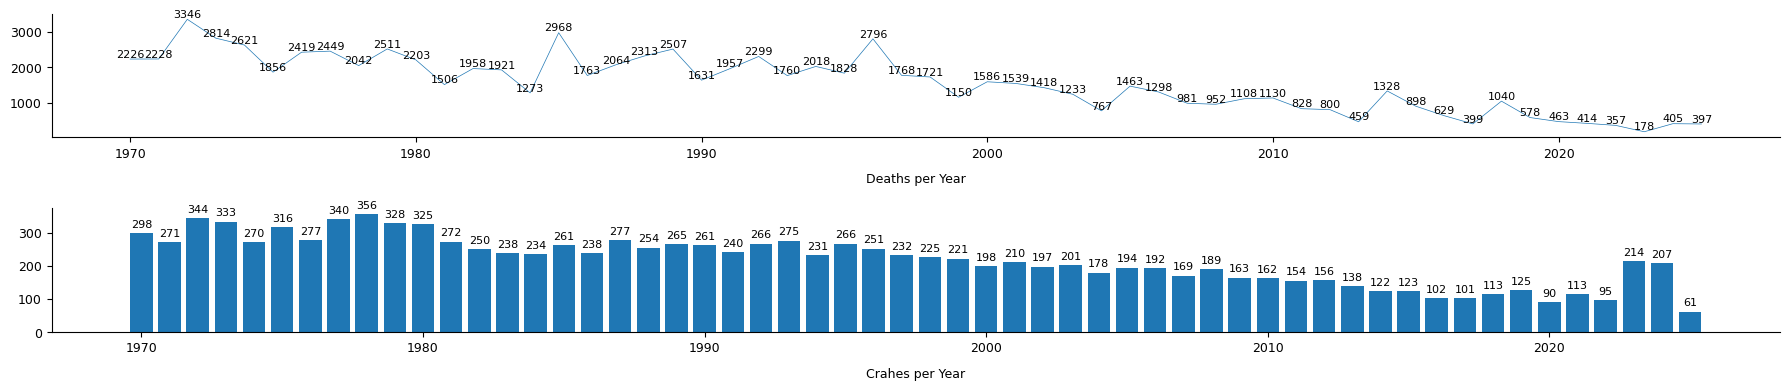

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 4))

# Plotting visualization

ax[0].plot(df['Year'], df['Deaths'], label='Deaths',linewidth=0.5) # Lineplot (e.g. Deaths)
ax[0].set_xlabel("Deaths per Year", fontsize=9, labelpad=9)

# Formating visualization
for x, y in zip(df['Year'], df['Deaths']):
    ax[0].text(x, y + 1, f'{y}', ha='center', va='bottom', fontsize=8)

# Adjusting visualization
ax[0].tick_params(axis='both', labelsize=9)

ax[1].bar(df['Year'], df['Crashes']) # Barplot (e.g. Crashes)
ax[1].set_xlabel("Crahes per Year", fontsize=9, labelpad=9)

# Formating visualization
formatter = FuncFormatter(lambda x, _: f'{x:.0f}') # Formatter for the Y axis
ax[1].yaxis.set_major_formatter(formatter)

for container in ax[1].containers:
    ax[1].bar_label(container, fmt= formatter, label_type='edge', padding=3, fontsize=8) # Applying labels to each bar

# Adjusting visualization
ax[1].tick_params(axis='both', labelsize=9)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

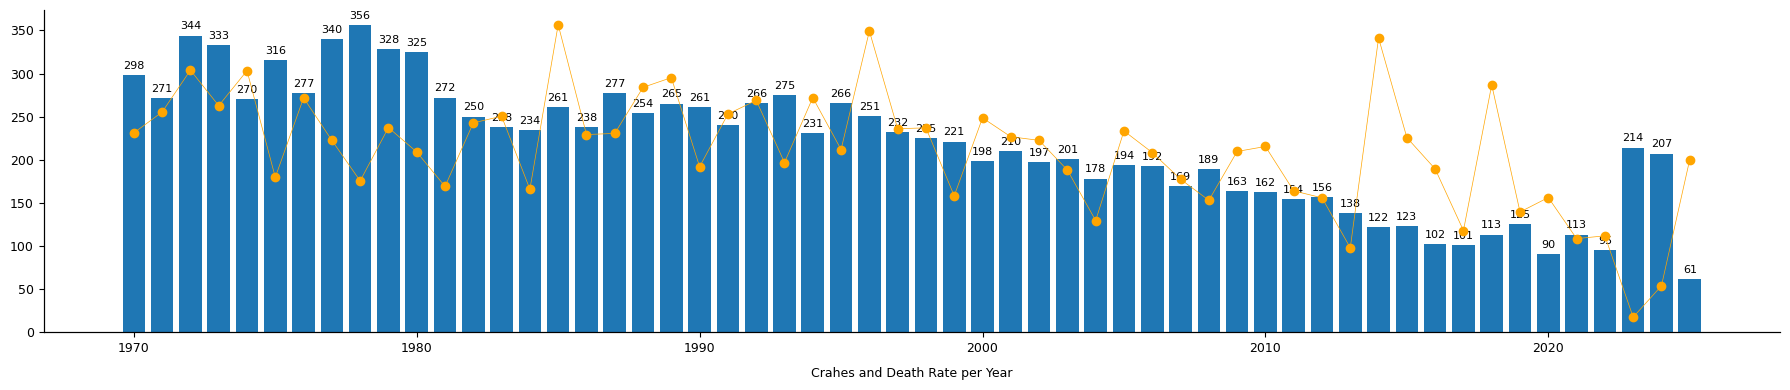

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))

# Plotting visualization
ax.bar(df['Year'], df['Crashes']) # Barplot (e.g. Crashes)
ax.set_xlabel("Crahes and Death Rate per Year", fontsize=9, labelpad=9)

# Formating visualization
formatter = FuncFormatter(lambda x, _: f'{x:.0f}') # Formatter for the Y axis
ax.yaxis.set_major_formatter(formatter)

for container in ax.containers:
    ax.bar_label(container, fmt= formatter, label_type='edge', padding=3, fontsize=8) # Applying labels to each bar

# Adjusting visualization
ax.tick_params(axis='both', labelsize=9)

ax2 = ax.twinx()

# Plotting visualization
ax2.plot(df['Year'], df['Death_rate'], color='Orange', marker='o', label='Rate', linewidth=0.5)
ax2.set_ylabel("Death_rate", fontsize=9)

# Hide the right Y-axis (ax2)
ax2.spines['right'].set_visible(False) # Hide axis line
ax2.tick_params(right=False, labelright=False) # Hide ticks and tick labels
ax2.set_ylabel("") # Hide axis label

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

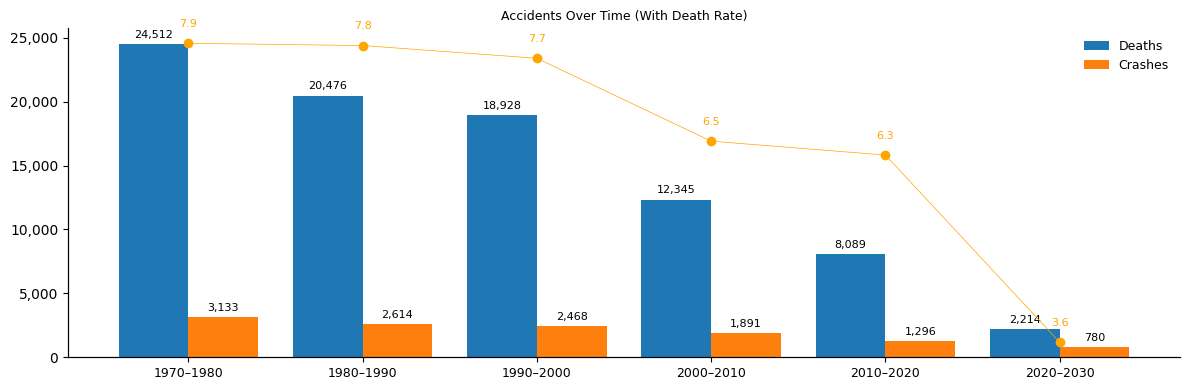

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

x = np.arange(len(df_periods['Period'])) # X locations for groups
width = 0.4 # Width of each bar

# Plotting visualization
ax.bar(x - width/2, df_periods['Deaths'], width, label='Deaths')
ax.bar(x + width/2, df_periods['Crashes'], width, label='Crashes')

# Formating visualization
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}') # Formatter for the Y axis
ax.yaxis.set_major_formatter(formatter)

for container in ax.containers:
    ax.bar_label(container, fmt= formatter, label_type='edge', padding=3, fontsize=8) # Applying labels to each bar

# Adjusting visualization
ax.set_xticklabels(df_periods['Period'], fontsize=9)
ax.set_xlabel('')
ax.set_title('Accidents Over Time (With Death Rate)', fontsize=9)
ax.legend(loc='upper right', ncol=1, frameon=False, fontsize=9)

ax2 = ax.twinx()

# Plotting visualization
ax2.plot(df_periods['Period'], df_periods['Death_rate'], color='Orange', marker='o', label='Death Rate', linewidth=0.5)
ax2.set_ylabel("Death Rate", fontsize=9)

# Formating visualization
for i, value in enumerate(df_periods['Death_rate']):
    ax2.text(i, value + 0.2, f'{value:.1f}', ha='center', va='bottom', fontsize=8, color='orange')

# Adjusting visualization
ax2.spines['right'].set_visible(False) # Hide axis line
ax2.tick_params(right=False, labelright=False) # Hide ticks and tick labels
ax2.set_ylabel("") # Hide axis label

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

plt.show()

##### **OLS Regression**

In [18]:
import statsmodels.api as sm

X = df[['Year','Deaths']]
y = df['Crashes']

X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Crashes   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     125.2
Date:                Thu, 04 Sep 2025   Prob (F-statistic):           8.37e-21
Time:                        13:25:20   Log-Likelihood:                -270.77
No. Observations:                  56   AIC:                             547.5
Df Residuals:                      53   BIC:                             553.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6756.3088   1095.980      6.165      0.0

## **Insights**
--

### **Statistics**:
* Based on the data provided in this dataset, it's possible to see the correlation between Crashes, Deaths and calculate the Death Rate. This is statistically valid.
* The number of deaths is increasingly lower each year along with the number of crashes. This indicates how robust the aviation sector is. It's a sector that is always improving upon its mistakes.
* Flying today is much safer than flying 10 years ago and so on.

# **Thank You for taking the time to view this Notebook**!
​
If you found this analysis useful and have any feedback or suggestions, don't hesitate to contact me! We are here to learn!